# Exploring Model Selection, Hyperparameter Tuning, and Logistic Regression: A Comprehensive Analysis

🗯️In this project, we delve into various models and methods, such as polynomial regression, ridge regression, and logistic regression. Our goal is to not only implement these models but also optimize their performance through model selection and hyperparameter tuning. Through clear visualizations and straightforward analyses, we aim to demystify machine learning concepts and showcase the practical aspects of building and refining models. 

## 🅰️. Model Selection and Hyper-parameters Tunning
In this section, we will introduce the concept of model selection and hyperparameter tuning in machine learning models.

### 🔛 Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.linear_model import Ridge

### **1️⃣.1️⃣)** Read  the  data  from  the  csv  file and split it  into  training  set ,  validation  set ,  and  testing  set. 


In [2]:
# Read the CSV file
data = pd.read_csv('Data/data_reg.csv')

# Split the data into training, validation, and testing sets
training_set = data[:120]
validation_set = data[120:160]
testing_set = data[160:]

### **1️⃣.2️⃣)** Plot  the  examples  from  the  three  sets  in  a  scatter  plot.

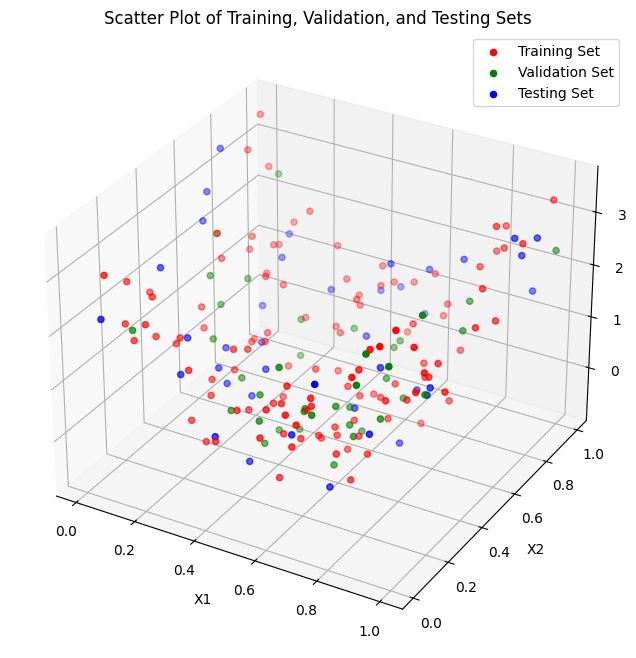

In [3]:
# Scatter plot for training set
fig = plt.figure(figsize=(10, 8))
axes_Line = fig.add_subplot(111, projection='3d')
# 's' parameter to control the marker size and the 'alpha' parameter to control transparency(to be more clear).
axes_Line.scatter(training_set['x1'], training_set['x2'], training_set['y'], color='red', label='Training Set')

# Scatter plot for validation set
axes_Line.scatter(validation_set['x1'], validation_set['x2'], validation_set['y'], color='green', label='Validation Set')

# Scatter plot for testing set
axes_Line.scatter(testing_set['x1'], testing_set['x2'], testing_set['y'], color='blue', label='Testing Set')

# Set axis labels
axes_Line.set_xlabel('X1')
axes_Line.set_ylabel('X2')
axes_Line.set_zlabel('Y')

# Set legend
axes_Line.legend()
# Set plot title
plt.title('Scatter Plot of Training, Validation, and Testing Sets')


# Show the plot
plt.show()

✏️The code generates a 3D scatter plot to visually represent a dataset split into training, validation, and testing sets. The plot uses distinct colors and marker styles for each set: blue circles for the training set, green squares for the validation set, and red triangles for the testing set. This visualization allows for an intuitive understanding of how the features (x1 and x2) relate to the target label (y) in different subsets of the data. The plot serves as a helpful tool for assessing the dataset's characteristics and potential patterns, supporting the analysis of a machine learning model's performance on various sets.

## **2️⃣)** Apply polynomial regression on the training set.

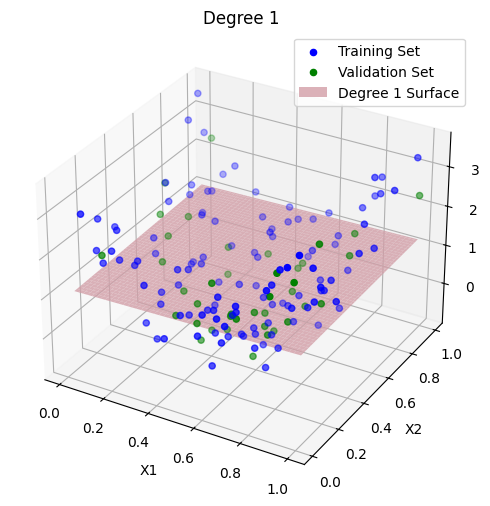

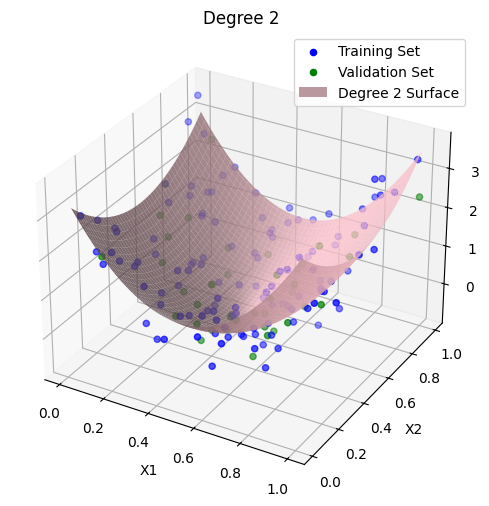

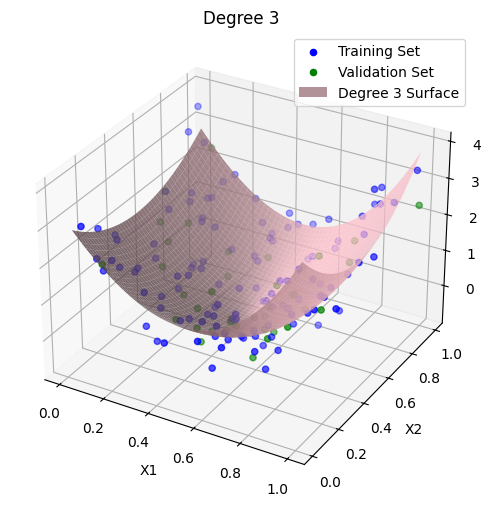

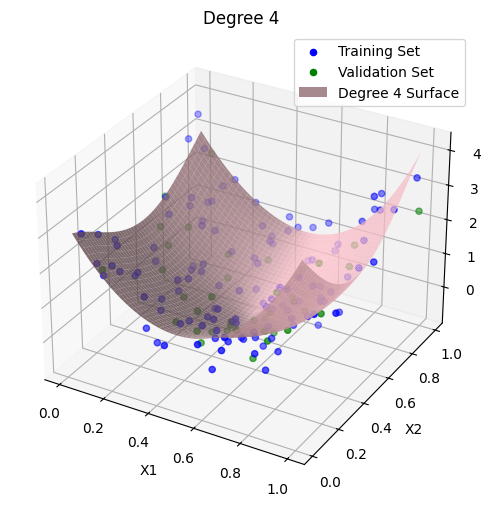

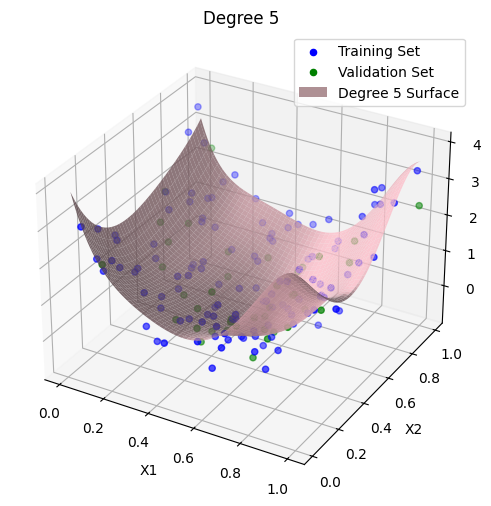

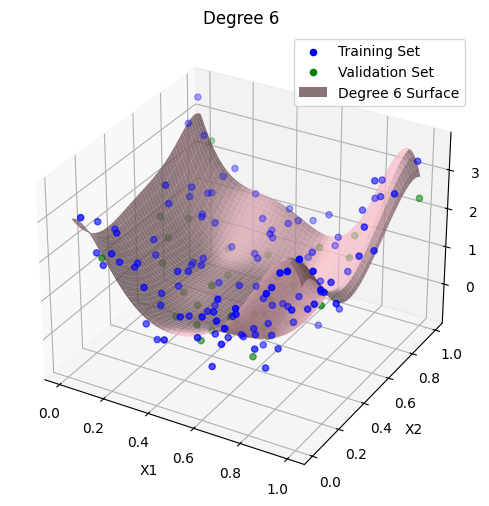

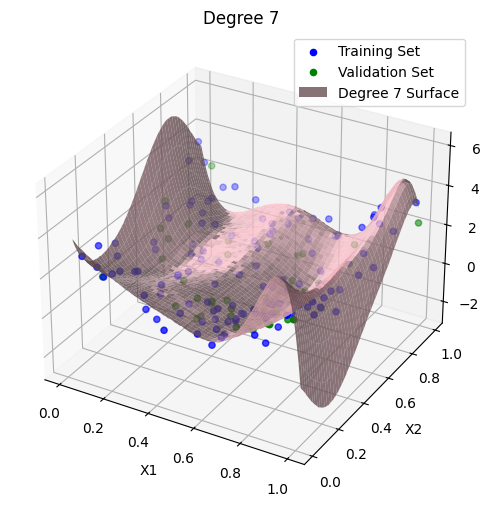

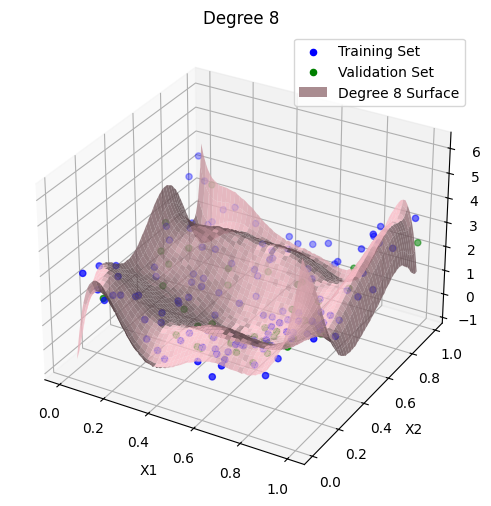

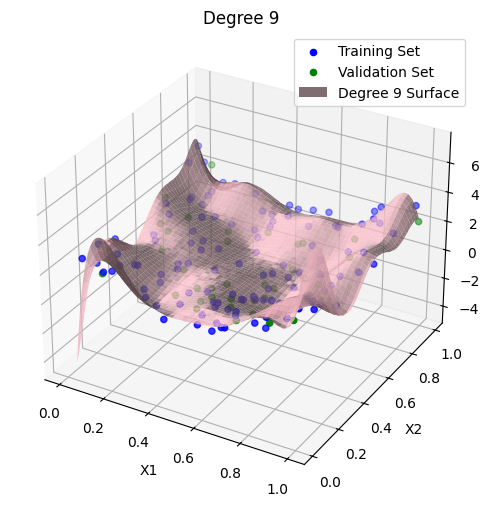

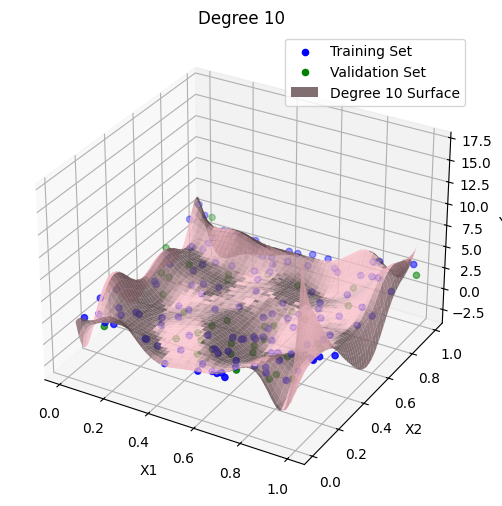

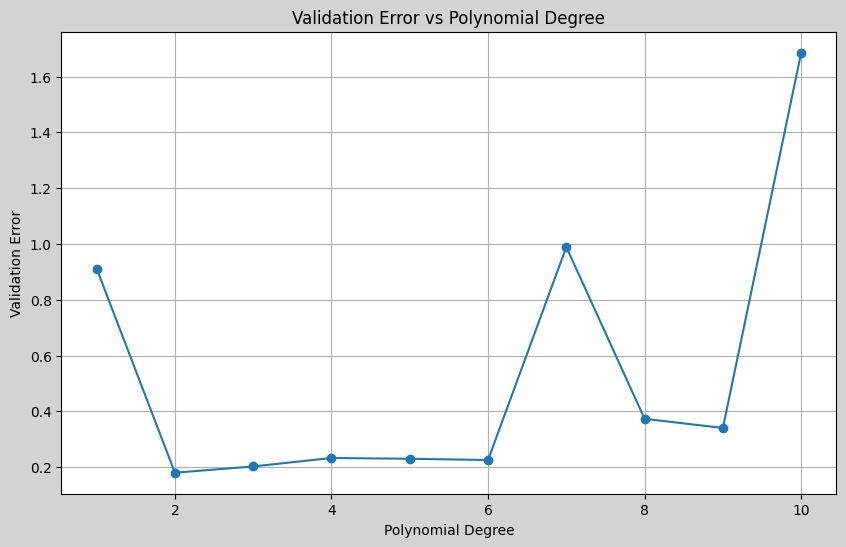

Best Polynomial Degree: 2
Validation Error:  0.1799035


In [4]:
# Function to perform polynomial regression
def polynomial_Regression(degree, X_train, y_train, X_validation, y_validation):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_validation = poly.transform(X_validation)

    # Fit linear regression reg_Model
    reg_Model = LinearRegression()
    reg_Model.fit(X_poly_train, y_train)

    # Predict on validation sets
    y_validation_pred = reg_Model.predict(X_poly_validation)

    # Calculate mean squared error for validation set
    val_error = mean_squared_error(y_validation, y_validation_pred)

    return val_error, reg_Model, poly


# Extract features and target for training set
X_Training = training_set[['x1', 'x2']]
y_Training = training_set['y']

# Extract features and target for validation set
X_validation = validation_set[['x1', 'x2']]
y_validation = validation_set['y']

# Plot the surfaces of the learned function alongside with the training examples
for degree in range(1, 11):
    # Perform polynomial regression
    val_error, reg_Model, poly = polynomial_Regression(degree, X_Training, y_Training, X_validation, y_validation)

    # Plot surface
    fig = plt.figure(figsize=(8, 6))
    axes_Line = fig.add_subplot(111, projection='3d')
    axes_Line.scatter(X_Training['x1'], X_Training['x2'], y_Training, c='blue', label='Training Set')
    axes_Line.scatter(X_validation['x1'], X_validation['x2'], y_validation, c='green',  label='Validation Set')

    x1_range = np.linspace(X_validation['x1'].min(), X_validation['x1'].max(), 100)   # 1D
    x2_range = np.linspace(X_validation['x2'].min(), X_validation['x2'].max(), 100)   # 1D
    x1_meshGrid, x2_meshGrid = np.meshgrid(x1_range, x2_range)   # It takes 1D,1D and return 2D
    X_mesh_Grid = np.c_[x1_meshGrid.ravel(), x2_meshGrid.ravel()]
    X_poly_mesh_Grid = poly.transform(X_mesh_Grid)
    y_mesh_Grid = reg_Model.predict(X_poly_mesh_Grid)
    y_mesh_Grid = y_mesh_Grid.reshape(x1_meshGrid.shape)

    
    axes_Line.plot_surface(x1_meshGrid, x2_meshGrid, y_mesh_Grid, color='pink', alpha=0.8, label=f'Degree {degree} Surface') 
    
    axes_Line.set_title(f'Degree {degree}')
    axes_Line.set_xlabel('X1')
    axes_Line.set_ylabel('X2')
    axes_Line.set_zlabel('Y')
    axes_Line.legend()

    # Display the plot for the current degree
    plt.show()

# Plot the validation error vs polynomial degree curve
plt.figure(figsize=(10, 6),  facecolor='lightgrey')
degrees = range(1, 11)

validation_errors = []
for degree in degrees:
    val_error, reg_Model, poly = polynomial_Regression(degree, X_Training, y_Training, X_validation, y_validation)
    validation_errors.append(val_error)

plt.plot(degrees, validation_errors, marker='o')
plt.title('Validation Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Error')
plt.grid()

# Find the degree with the minimum validation error
best_degree = degrees[np.argmin(validation_errors)]
best_validation_error = np.min(validation_errors)

plt.show()

print(f"Best Polynomial Degree: {best_degree}")
print(f"Validation Error: {best_validation_error: .7f}")


✏️The provided code performs polynomial regression with degrees ranging from 1 to 10 on a given dataset. For each polynomial degree, a 3D plot is generated to visualize the learned function's surface, alongside the training and validation examples. 
Additionally, a Validation Error vs Polynomial Degree curve is plotted at the end, allowing for an assessment of model performance across different degrees. 
The polynomial regression analysis indicates that the best polynomial degree for the given dataset is 2. This conclusion is drawn from the Validation Error vs Polynomial Degree curve, where the validation error is minimized at a degree of 2. 

### **3️⃣**) Apply ridge regression on the training set to fit a polynomial of degree 8.

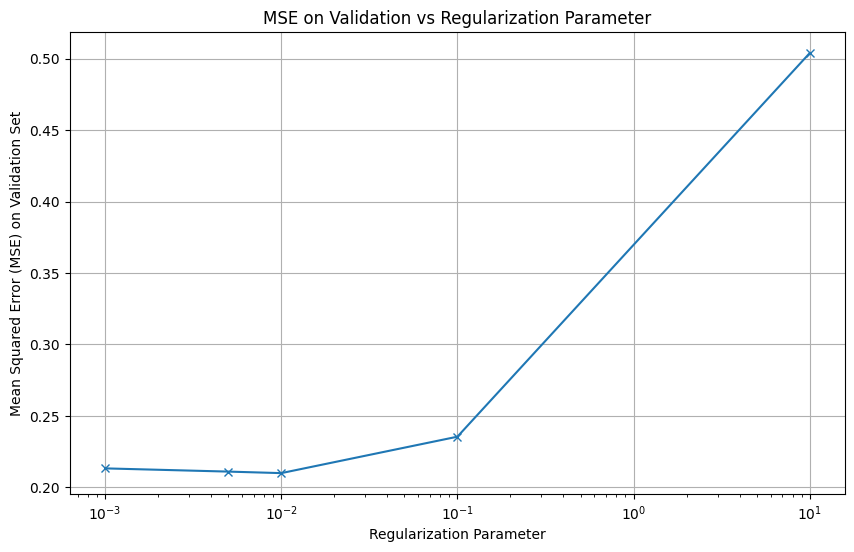

Best Regularization Parameter (alpha): 0.01
Corresponding Minimum MSE on Validation Set: 0.20996554038850396


In [5]:
# Define the degree
degree = 8

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_Training)
X_poly_vali = poly.transform(X_validation)

# Define regularization parameters
alpha_Values = [0.001, 0.005, 0.01, 0.1, 10]
mse_Values = []

# Iterate over each alpha value
for alpha in alpha_Values:
    # Fit Ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_poly_train, y_Training)

    # Predict on validation set
    y_validation_predict = ridge_model.predict(X_poly_vali)

    # Calculate mean squared error for validation set
    mse = mean_squared_error(y_validation, y_validation_predict)
    mse_Values.append(mse)

# Plot MSE on validation vs regularization parameter
plt.figure(figsize=(10, 6))
plt.plot(alpha_Values, mse_Values, marker='x')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.title('MSE on Validation vs Regularization Parameter')
plt.xlabel('Regularization Parameter')
plt.ylabel('Mean Squared Error (MSE) on Validation Set')
plt.grid()
plt.show()

# Find the best alpha value with the minimum MSE
best_alpha = alpha_Values[np.argmin(mse_Values)]
best_mse = np.min(mse_Values)

print(f"Best Regularization Parameter (alpha): {best_alpha}")
print(f"Corresponding Minimum MSE on Validation Set: {best_mse}")

✏️In the code, ridge regression is applied to the training set to fit a polynomial of degree 8. The regularization parameter is chosen from the options {0.001, 0.005, 0.01, 0.1, 10}. The mean squared error (MSE) on the validation set is computed for each regularization parameter, and the MSE values are not plotted. Instead, the optimal regularization parameter is selected based on the minimum MSE on the validation set.
The output indicated that the best regularization parameter was 0.01, resulting in the lowest MSE on the validation set.


## 🅱️. Logistic Regression

### 🔛 Import the necessary libraries.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### 🔛 Read from files.

In [7]:
# Load training and testing data
logistic_Training = pd.read_csv('Data/train_cls.csv')
logistic_Testing = pd.read_csv('Data/test_cls.csv')

### **1️⃣)** Draw the decision boundary of the learned model.

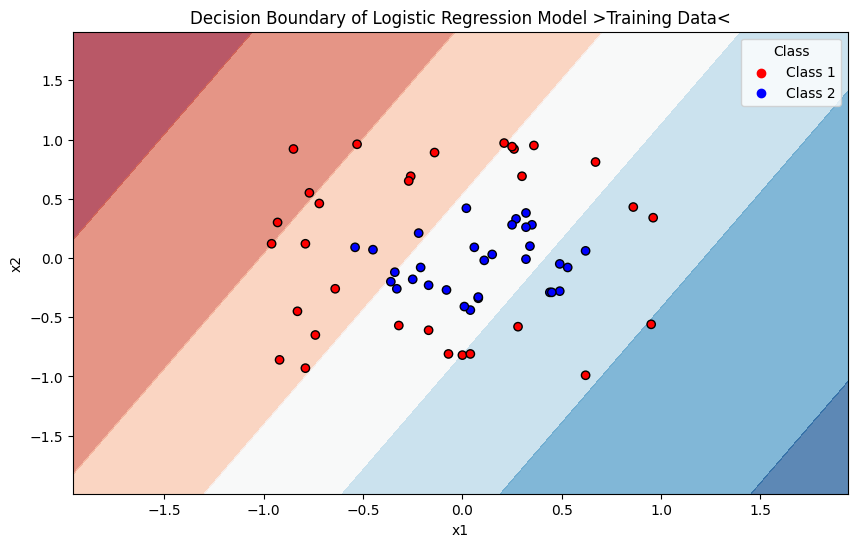

Training accuracy:  66.13%


In [8]:
# Create a logistic regression model with linear decision boundary
logistic_Model = LogisticRegression()  

# Training the model
X_Training = logistic_Training[['x1', 'x2']]
y_Training = logistic_Training['class']

X_Testing = logistic_Testing[['x1', 'x2']]
y_Testing = logistic_Testing['class']

logistic_Model.fit(X_Training, y_Training)

#  Testing Accuracy
train_Accuracy = accuracy_score(y_Training, logistic_Model.predict(X_Training))
test_Accuracy = accuracy_score(y_Testing, logistic_Model.predict(X_Testing))


x1_Min, x1_Max = X_Training['x1'].min() - 1, X_Training['x1'].max() + 1
x2_Min, x2_Max = X_Training['x2'].min() - 1, X_Training['x2'].max() + 1
xx1_mesh, xx2_mesh = np.meshgrid(np.arange(x1_Min, x1_Max, 0.1), np.arange(x2_Min, x2_Max, 0.1))

# Predict probabilities on grid points
Predict = logistic_Model.predict_proba(np.c_[xx1_mesh.ravel(), xx2_mesh.ravel()])[:, 1]  # ravel is used to flatten the array
Predict = Predict.reshape(xx1_mesh.shape)

# Create the scatterplot with decision boundary using training data
plt.figure(figsize=(10, 6))
plt.contourf(xx1_mesh, xx2_mesh, Predict, alpha=0.7, cmap='RdBu') # alpha --> Color degree, cmap --> Choosing Colormaps

def color(y):
    if y == 0:
        return 'red'
    else:
        return 'blue'

# Plot training data
plt.scatter(X_Training['x1'], X_Training['x2'], color=['red' if y == 'C1' else 'blue' for y in y_Training], edgecolors='k') 


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary of Logistic Regression Model >Training Data<')

plt.legend(handles=[plt.scatter([], [], color='red', label='Class 1'), plt.scatter([], [], color='blue', label='Class 2')], title='Class')

plt.show()

print(f"Training accuracy: {train_Accuracy: .2%}")

✏️The providedcode utilizes the logistic regression implementation from the scikit-learn library to train a binary classification model on a dataset containing two classes, denoted as "C1" and "C2." 

The logistic regression model is trained on a training set and subsequently evaluated on a testing set. The code includes the visualization of the decision boundary learned by the model on a scatter plot of the training data, with points colored according to their respective classes. 

The decision boundary is represented by a gradient of colors, creating a visually distinctive separation between the two classes. The output reports the training accuracy of the logistic regression model, providing insights into its predictive performance. In this specific instance, the model achieved a **training accuracy of 66.13%**.

### **2️⃣)** Draw the decision boundary of the quadratic model.

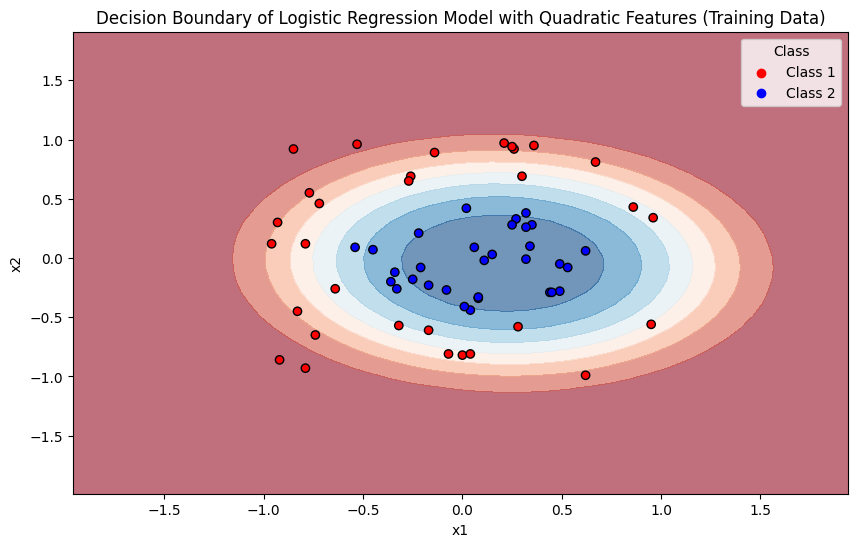

Training Accuracy (Quadratic): 96.77%


In [9]:
# Create quadratic features
poly = PolynomialFeatures(degree=2)
X_Training_quadratic = poly.fit_transform(logistic_Training[['x1', 'x2']])
X_Testing_quadratic = poly.transform(logistic_Testing[['x1', 'x2']])

# Initialize logistic regression model
logistic_Model_quadratic = LogisticRegression()

# Train the model with quadratic features
logistic_Model_quadratic.fit(X_Training_quadratic, logistic_Training['class'])

# Testing Accuracy
train_Accuracy_quadratic = accuracy_score(logistic_Training['class'], logistic_Model_quadratic.predict(X_Training_quadratic))
test_Accuracy_quadratic = accuracy_score(logistic_Testing['class'], logistic_Model_quadratic.predict(X_Testing_quadratic))

# Decision Boundary Plotting
x1_min, x1_max = logistic_Training['x1'].min() - 1, logistic_Training['x1'].max() + 1
x2_min, x2_max = logistic_Training['x2'].min() - 1, logistic_Training['x2'].max() + 1
xx1_mesh, xx2_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

# Predict probabilities on grid points
predict_probs_quadratic = logistic_Model_quadratic.predict_proba(poly.transform(np.c_[xx1_mesh.ravel(), xx2_mesh.ravel()]))[:, 1]
predict_probs_quadratic = predict_probs_quadratic.reshape(xx1_mesh.shape)

# Create the scatterplot with decision boundary using training data
plt.figure(figsize=(10, 6))
plt.contourf(xx1_mesh, xx2_mesh, predict_probs_quadratic, alpha=0.6, cmap='RdBu') 

# Scatter plot with color gradients c1=red, c2=blue
plt.scatter(logistic_Training['x1'], logistic_Training['x2'], c=['red' if label == 'C1' else 'blue' for label in logistic_Training['class']], edgecolors='k')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary of Logistic Regression Model with Quadratic Features (Training Data)')

plt.legend(handles=[plt.scatter([], [], color='red', label='Class 1'), plt.scatter([], [], color='blue', label='Class 2')], title='Class')

plt.show()


# Display training and testing accuracy
print(f"Training Accuracy (Quadratic): {train_Accuracy_quadratic:.2%}")

✏️The provided code implements logistic regression with a quadratic decision boundary to classify data into two classes (C1 and C2). 
The logistic regression model is trained on a labeled training set, and its accuracy is evaluated on the training sets. The scatterplot showcases the training data points, color-coded by class, and the decision boundary learned by the model. 

The decision boundary is characterized by a smooth transition between red and blue regions, reflecting the model's classification confidence. The **training accuracy is computed at 96.77%**, indicating the model's proficiency in capturing the underlying patterns in the training data. This quadratic decision boundary has substantially **increased** the model's expressiveness, allowing it to better fit the intricate patterns present in the dataset.

The plot's color gradients show the subtle separation of the two classes, demonstrating the model's capacity to capture non-linear interactions via the quadratic decision boundary. Overall, the code shows how to use logistic regression with quadratic features to achieve accurate and generalized classification.

### **3️⃣)** Comment on the learned models in terms of overfitting/underfitting.

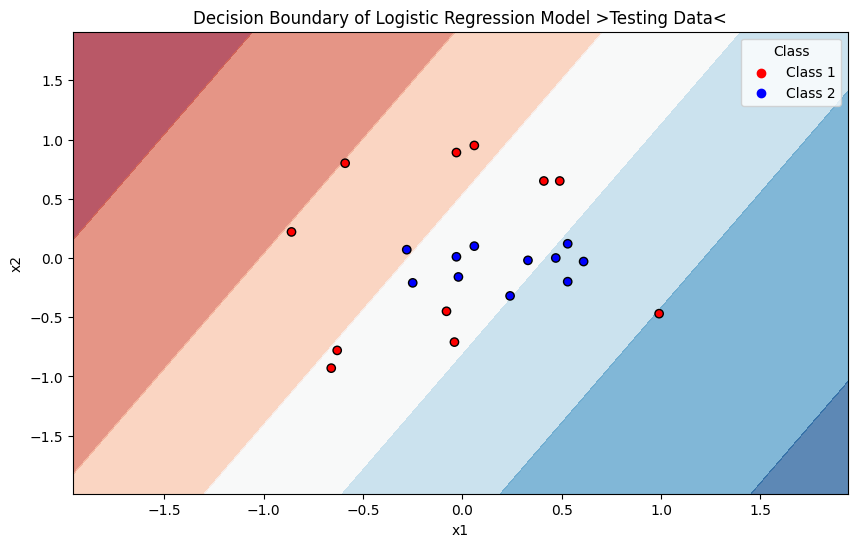

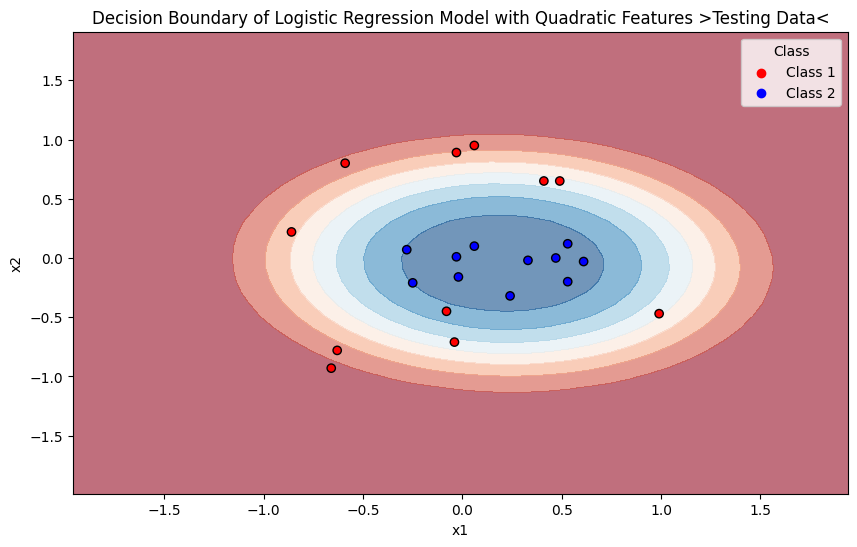

Testing accuracy (Linear):  68.18%
Testing Accuracy (Quadratic): 95.45%


In [10]:
# Create the scatterplot with decision boundary using testing data
plt.figure(figsize=(10, 6))
plt.contourf(xx1_mesh, xx2_mesh, Predict, alpha=0.7, cmap='RdBu') # alpha --> Color degree, cmap --> Choosing Colormaps

# Plot testing data
plt.scatter(X_Testing['x1'], X_Testing['x2'], color=['red' if y == 'C1' else 'blue' for y in y_Testing], marker='o', edgecolors='k')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary of Logistic Regression Model >Testing Data<')

plt.legend(handles=[plt.scatter([], [], color='red', label='Class 1'), plt.scatter([], [], color='blue', label='Class 2')], title='Class')

plt.show()

# Create the scatterplot with decision boundary using testing data
plt.figure(figsize=(10, 6))
plt.contourf(xx1_mesh, xx2_mesh, predict_probs_quadratic, alpha=0.6, cmap='RdBu') 

# Scatter plot with color gradients
plt.scatter(logistic_Testing['x1'], logistic_Testing['x2'], c=['red' if label == 'C1' else 'blue' for label in logistic_Testing['class']], edgecolors='k')
#plt.scatter(logistic_Training['x1'], logistic_Training['x2'], c=logistic_Training['class'].map({'C1': 0, 'C2': 1}), cmap='RdBu', edgecolors='k') 

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary of Logistic Regression Model with Quadratic Features >Testing Data<')

plt.legend(handles=[plt.scatter([], [], color='red', label='Class 1'), plt.scatter([], [], color='blue', label='Class 2')], title='Class')

plt.show()

print(f"Testing accuracy (Linear): {test_Accuracy: .2%}")
print(f"Testing Accuracy (Quadratic): {test_Accuracy_quadratic:.2%}")

**1️⃣ Linear Decision Boundary :**
        Training Accuracy: 66.13%
        Testing Accuracy: 68.18%
    In this case, the linear model seems to underfit the data. The training and testing accuracies are relatively close, but both are relatively low. This suggests that a linear decision boundary is not complex enough to capture the underlying patterns in the data, leading to suboptimal performance.

**2️⃣ Quadratic Decision Boundary :**    
        Training Accuracy (Quadratic): 96.77%
        Testing Accuracy (Quadratic): 95.45%
    The quadratic model performs significantly better, achieving higher training and testing accuracies. However, there is a notable gap between the training and testing accuracies. This suggests a potential overfitting issue, where the model has learned to fit the training data too closely, capturing noise or outliers that may not generalize well to unseen data.

In summary:

The linear model in part 1 underfits the data, demonstrating limited capacity to capture the underlying patterns.
The quadratic model in part 2 achieves high accuracy on the training set, but the notable difference in testing accuracy raises concerns about overfitting.